
Please find below the Project 2 for  Introduction to Neural Networks and Deep Learning course. This is an individual assignment. Kindly submit it before it's deadline.

PFB the link to the project brief:

NN_Project2_Brief.pdfView in a new window

Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing (Links to an external site.)Links to an external site.

## Project Objectve 

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:      
- Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
- Data fetching and understand the train/val/test splits. 
- Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points) 
- Print the classification metric report (2.5 points) 
- Implement and apply a deep neural network classifier including (feedforward  neural network, RELU activations) (5 points) 
-  Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points) 
-  Implement batch normalization for training the neural network (2.5 points)  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from __future__ import print_function
import keras
import keras.optimizers as opt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn

Using TensorFlow backend.


In [3]:
# Datasets 

!ls "/content/drive/My Drive/SVHNN"

SVHN_single_grey1.h5


In [0]:
filename = '/content/drive/My Drive/SVHNN/SVHN_single_grey1.h5'
root_dir = '/content/drive/My Drive/'

In [5]:
fl = h5py.File(filename, 'r')
print(list(fl.keys()))

img_train = fl[u'X_train']
img_test = fl[u'X_test']
img_val = fl[u'X_val']

lbl_train = fl[u'y_train']
lbl_test = fl[u'y_test']
lbl_val = fl[u'y_val']

img_train.shape,img_test.shape,img_val.shape, lbl_train.shape,lbl_test.shape

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


((42000, 32, 32), (18000, 32, 32), (60000, 32, 32), (42000,), (18000,))

In [6]:
# retrieve the train ,test images and reshape them.

x_train = np.array(img_train)
x_test = np.array(img_test)
x_val=np.array(img_val)

#reshape data to fit model
x_train = x_train.reshape(42000,32,32,1)
x_test = x_test.reshape(18000,32,32,1)
x_val=x_val.reshape(60000,32,32,1)

print(x_test.shape)
print(x_train.shape)

(18000, 32, 32, 1)
(42000, 32, 32, 1)


In [0]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

6


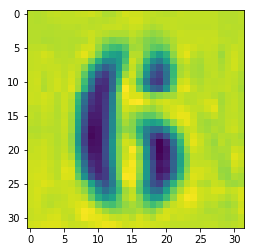

In [8]:
print(lbl_train[1000])
plt.imshow(x_train[1000].reshape(32,32));

In [9]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(lbl_train, 10)
y_test = keras.utils.to_categorical(lbl_test, 10)

print(y_train.shape,y_test.shape)

(42000, 10) (18000, 10)


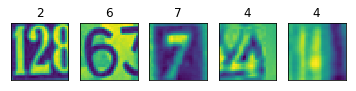

In [10]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])
        
plot_images(x_train, lbl_train, 1, 5)

In [11]:
# normalize the data

train_mean = np.mean(x_train, axis=0) #Shape (32,1)
train_std = np.std(x_train, axis=0) #Shape (32,1)
x_train_norm = (x_train - train_mean) / train_std
x_train_255 = np.divide(x_train, 255)
x_train_255 = np.array(x_train_255)

x_test_255 = np.divide(x_test, 255)
x_test_255 = np.array(x_test_255)

print("X_train_norm Shape: ", x_train_norm.shape)
print("X_train_255 Shape: ", x_train_255.shape)
print("X_test_255 Shape: ", x_test_255.shape)

X_train_norm Shape:  (42000, 32, 32, 1)
X_train_255 Shape:  (42000, 32, 32, 1)
X_test_255 Shape:  (18000, 32, 32, 1)


In [12]:
# Convert 3d images into 2d 
nsamples, nx, ny, gsc = x_train.shape
msamples,mx,my,mgsc = x_test.shape
xtrain = x_train.reshape((nsamples,nx*ny))
xtest = x_test.reshape((msamples,mx*my))

print("Xtrain 32*32: ", xtrain.shape)
print("Xtest32*32: ", xtest.shape)

Xtrain 32*32:  (42000, 1024)
Xtest32*32:  (18000, 1024)


In [0]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 30, 2)
accuracies = []

In [14]:
# loop over kVals
for k in range(1, 30, 2):
# train the classifier with the current value of `k`
  model = KNeighborsClassifier(n_neighbors=k ,algorithm='brute',weights='distance')
  model.fit(xtrain, y_train)

    # evaluate the model and print the accuracies list
  score = model.score(xtest, y_test)
  print("k=%d, accuracy=%.2f%%" % (k, score * 100))
  accuracies.append(score)
    
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],accuracies[i] * 100))

k=1, accuracy=45.92%
k=3, accuracy=37.87%
k=5, accuracy=32.44%
k=7, accuracy=28.76%
k=9, accuracy=26.04%
k=11, accuracy=23.69%
k=13, accuracy=21.72%
k=15, accuracy=20.14%
k=17, accuracy=18.74%
k=19, accuracy=17.53%
k=21, accuracy=16.38%
k=23, accuracy=15.39%
k=25, accuracy=14.59%
k=27, accuracy=13.69%
k=29, accuracy=13.14%
k=1 achieved highest accuracy of 45.92% on validation data


In [15]:

# K value 1 gave the high accuracy. Use the 32*32 image source

model = KNeighborsClassifier(n_neighbors=1,algorithm='brute')
model.fit(xtrain, y_train)
predictions = model.predict(xtest)

score = model.score(xtest, y_test)
print("Accuracy=" , (score * 100))
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

Accuracy= 45.916666666666664
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000
 samples avg       0.46      0.46      0.46     18000



In [16]:
from keras.constraints import max_norm
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), strides=1, activation='relu',input_shape=(32, 32, 1), kernel_constraint=max_norm(3)))
model2.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model2.add(Conv2D(64, (3, 3), activation='relu', strides=1, kernel_constraint=max_norm(3)))
model2.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model2.add(Conv2D(128, (3, 3), activation='relu', strides=1, kernel_constraint=max_norm(3)))
model2.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='acc', patience=3, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

W0805 07:26:28.234192 140515774850944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 07:26:28.297349 140515774850944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 07:26:28.309251 140515774850944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 07:26:28.360197 140515774850944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0805 07:26:28.430806 140515774850944 deprecation_wrapp

In [17]:
model2.fit(x_train_255, y_train,batch_size=32,epochs=10, callbacks=callback_list, verbose=True)

W0805 07:26:57.034713 140515774850944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 07:26:57.109011 140515774850944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
42000/42000 [==============================] - 53s 1ms/step - loss: 1.3141 - acc: 0.5477
Epoch 2/10
42000/42000 [==============================] - 53s 1ms/step - loss: 0.5903 - acc: 0.8234
Epoch 3/10
42000/42000 [==============================] - 51s 1ms/step - loss: 0.4619 - acc: 0.8618
Epoch 4/10
42000/42000 [==============================] - 51s 1ms/step - loss: 0.3923 - acc: 0.8833
Epoch 5/10
42000/42000 [==============================] - 52s 1ms/step - loss: 0.3525 - acc: 0.8934
Epoch 6/10
42000/42000 [==============================] - 53s 1ms/step - loss: 0.3188 - acc: 0.9042
Epoch 7/10
42000/42000 [==============================] - 52s 1ms/step - loss: 0.2985 - acc: 0.9092
Epoch 8/10
42000/42000 [==============================] - 52s 1ms/step - loss: 0.2765 - acc: 0.9150
Epoch 9/10
42000/42000 [==============================] - 51s 1ms/step - loss: 0.2583 - acc: 0.9203
Epoch 10/10
42000/42000 [==============================] - 51s 1ms/step - loss: 0.2430 - acc: 0.9260

In [18]:
print('Evaluation')
loss, acc = model2.evaluate(x_test_255,y_test,batch_size=32)
print('Test loss / test accuracy = {:.4f} / {:.4f}'.format(loss, acc))

Evaluation
18000/18000 [==============================] - 6s 307us/step
Test loss / test accuracy = 0.3874 / 0.8923


In [19]:
#Model with relu

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

sgd_optimizer = opt.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

W0805 07:37:06.848140 140515774850944 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.fit(x_train_255, y_train,
              batch_size=32,
              epochs=10,callbacks=callback_list, verbose=True)

Epoch 1/10
42000/42000 [==============================] - 199s 5ms/step - loss: 2.3033 - acc: 0.1040
Epoch 2/10
42000/42000 [==============================] - 199s 5ms/step - loss: 1.0911 - acc: 0.6348
Epoch 3/10
42000/42000 [==============================] - 203s 5ms/step - loss: 0.4959 - acc: 0.8482
Epoch 4/10
42000/42000 [==============================] - 202s 5ms/step - loss: 0.3783 - acc: 0.8823
Epoch 5/10
42000/42000 [==============================] - 200s 5ms/step - loss: 0.3175 - acc: 0.9032
Epoch 6/10
42000/42000 [==============================] - 204s 5ms/step - loss: 0.2757 - acc: 0.9148
Epoch 7/10
42000/42000 [==============================] - 204s 5ms/step - loss: 0.2406 - acc: 0.9264
Epoch 8/10
42000/42000 [==============================] - 203s 5ms/step - loss: 0.2123 - acc: 0.9335
Epoch 9/10
42000/42000 [==============================] - 203s 5ms/step - loss: 0.1920 - acc: 0.9394
Epoch 10/10
42000/42000 [==============================] - 209s 5ms/step - loss: 0.1730 - a

In [21]:
print('Evaluation')
loss, acc = model.evaluate(x_test_255,y_test,batch_size=32)
print('Test loss / test accuracy = {:.4f} / {:.4f}'.format(loss, acc))

Evaluation
18000/18000 [==============================] - 22s 1ms/step
Test loss / test accuracy = 0.3154 / 0.9163


In [22]:
# Batch Normalization & Model with SGD

model_sgd = Sequential()
model_sgd.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:]))
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))

model_sgd.add(Conv2D(64, (5, 5),padding='same'))
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))
model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
model_sgd.add(Dropout(0.25))

model_sgd.add(Conv2D(64, (3, 3), padding='same'))
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))


model_sgd.add(Conv2D(64, (3, 3),padding='same'))
model_sgd.add(BatchNormalization())
model_sgd.add(Activation('relu'))


model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
model_sgd.add(Dropout(0.25))

model_sgd.add(Flatten())
model_sgd.add(Dense(512))
model_sgd.add(Activation('relu'))

model_sgd.add(Dense(10))
model_sgd.add(Activation('softmax'))

W0805 08:20:13.188760 140515774850944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



In [0]:
sgd_optimizer = opt.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_sgd.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

In [25]:
model_sgd.fit(x_train_255, y_train,batch_size=32,epochs=10,validation_data=(x_test_255, y_test), callbacks=callback_list, verbose=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 869s 21ms/step - loss: 1.3184 - acc: 0.5432 - val_loss: 0.7489 - val_acc: 0.7579
Epoch 2/10
42000/42000 [==============================] - 857s 20ms/step - loss: 0.4384 - acc: 0.8651 - val_loss: 0.3365 - val_acc: 0.8991
Epoch 3/10
42000/42000 [==============================] - 866s 21ms/step - loss: 0.3213 - acc: 0.9008 - val_loss: 0.3210 - val_acc: 0.9014
Epoch 4/10
42000/42000 [==============================] - 817s 19ms/step - loss: 0.2561 - acc: 0.9217 - val_loss: 0.2786 - val_acc: 0.9189
Epoch 5/10
42000/42000 [==============================] - 826s 20ms/step - loss: 0.2170 - acc: 0.9334 - val_loss: 0.2852 - val_acc: 0.9167
Epoch 6/10
42000/42000 [==============================] - 823s 20ms/step - loss: 0.1850 - acc: 0.9440 - val_loss: 0.2767 - val_acc: 0.9232
Epoch 7/10
42000/42000 [==============================] - 827s 20ms/step - loss: 0.1600 - acc: 0.9507 - val_loss: 0.

In [0]:
import seaborn as sns
# Predicting the Test set results & Printing the confusion matrix
y_pred = model_sgd.predict(x_test)
y_pred = (y_pred > 0.5)
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [28]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 715,   24,  788,    7,    6,    1,    7,    0,   61,  205],
       [  72,  790,  753,   11,   18,    2,    2,   18,   37,  125],
       [   1,    4, 1737,    8,    1,    1,    0,    3,    6,   42],
       [   4,   17,  689,  876,    1,   38,    2,    1,   48,   43],
       [  43,  123, 1049,   13,  437,    3,    1,    1,   45,   97],
       [   4,   11,  515,   77,    0, 1068,    7,    1,   58,   27],
       [  23,    9,  460,   58,    2,  135,  773,    1,  321,   50],
       [   9,  140,  698,  188,    3,    1,    1,  618,    7,  143],
       [   8,   24,  694,   37,    1,    5,    5,    1,  973,   64],
       [   7,   12,  945,    9,    3,    4,    1,    0,   57,  766]])

Text(91.68, 0.5, 'true label')

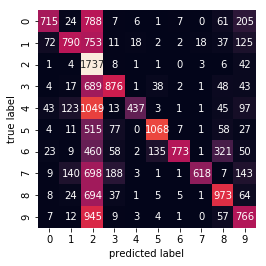

In [29]:
fig2=plt.figure()
fig2.add_subplot(111)
sns.heatmap(cm,annot=True,square=True,cbar=False,fmt="d")
plt.xlabel("predicted label")
plt.ylabel("true label")

In [0]:
#Observation 

**The observation with Street view images with KNN and NN is as below**

- KNN was able to predict the images of size (32*32) with 45.92 % accuracy . KNN captures available cases within the training set and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and traditional pattern recognition algorithm until CNN and deep learning came into existense
- KNN doesn't learn a discriminative function from the training data but memorizes the training dataset instead.So everytime you wanted to classify a test set it compares with entire training set which is time consuming and resource constraint.
- Whereas CNNs can be thought of automatic feature extractors from the image . it uses a algorithm with pixel vector and spatial interaction between pixels. a CNN effectively uses adjacent pixel information to effectively downsample the image first by convolution and then uses a prediction layer at the end to predict. Hence the accuracy of Simple NN classifiers started at 90% and went on to increase with backpropagation and batch normalization .